<table style="background-color:#F5F5F5;" width="100%">
<tr><td style="background-color:#F5F5F5;"><img src="../images/logo.png" width="150" align='right'/></td></tr>     <tr><td>
            <h2><center>Aprendizagem Automática em Engenharia Biomédica</center></h2>
            <h3><center>1st Semester - 2025/2026</center></h3>
            <h4><center>Universidade Nova de Lisboa - Faculdade de Ciências e Tecnologia</center></h4>
</td></tr>
    <tr><td><h2><b><center>Lab 4 - Evaluation in ML</center></b></h2>
    <h4><i><b><center>Metrics and Techniques</center></b></i></h4></td></tr>
</table>

## 1. ML Challenges

The development and training of ML models comprise a set of challenges that must be dealt with, to ensure usable robust solutions. Otherwise, although some initial results may seem promising, problems in when models are deployed in real-world will appear.

Different challenges can be overcomed by different techniques, but we need to know them before we go deeper into the solutions. Here are some of the main problems:

* __Insufficient Training Data__: Most ML models require a large set of examples to generalise well in even simple problems. Often we need thousands or millions of examples, however depending on the number of dimensions of the problem.

* __Nonrepresentative Training Data__: Available data must be representative of all possible scenarios related to the problem. If training data does not characterize well the problem, it is expected that new data in production will be severely different.

* __Poor-Quality Data__: The data collection process is often problematic, leading to examples with errors, outliers and noise. This makes it harder for the model to converge to the underlying patterns of the problem.

* __Irrelevant Features__: There is a saying in ML world: _Garbage In, Garbage Out_. If we want the model to learn the problem, data variables must contain the most relevant information. Furthermore, if training data is full of irrelevant features, the model may not be able to converge to a good solution.

* __Overfitting__: ML algorithms can often take quite complex forms, if they are allowed to, as training will always try to improve results. This search can end up with overfitted solution, which are behave seamlessly in training, but completely fails when new data comes.

* __Underfitting__: The contrary may also happen, when a model is too simple to learn the underlying structure of the data. If the reality is more complex than the model, then predictions are doomed to fail, even in training.

<h4><center>No Free Lunch Theorem</center></h4>
<center>"There is no one model that works best for every problem. The assumptions of a great model for one problem may not hold for another problem."</center>

<h3><center>How can we ensure we have trained a robust ML model?</center></h3>

## 2. Model Evaluation

Every ML model must be submitted to a set of evaluation strategies, to ensure that their performance meets the necessary requirements and does not fail on new testing data. 

During the development of a ML pipeline, the are a set of evaluation processes we can implement, to attest its quality:

* __Train-Test Data Splits__

* __Performance Metrics__

* __Cross Validation__


## 3. Scikit-Learn Package

The [Scikit-learn](https://scikit-learn.org/stable/index.html) library is the standard tool to train end-to-end ML pipelines. It offers a set of tools that range from data preparation to model training and evaluation.

Its methods are highly consistent between algorithms and provide an easy user interface:

* __Estimators__: Includes all objects that can estimate some set of paramenter based on a training set. The process od estimation is performed by the `fit()` method. When calling for an estimator, one can define a set of additional parameters to guide the training/fitting process, which are called hyperparameters.

* __Transformers__: Some estimators can also transform a dataset, especially with data preparation tools. These can be called by the `transform()` method, which resorts to previously fitted parameters to transform the data. The `fit_transform()` method is also available, to perform both actions in one method.

* __Predictors__: On the other hand, some estimators can make predictions on new data, after being fitted on the training set. The new data is sent to the `predict()` method, which returns the predictions. One can also call the `score()` method, which measures the quality of the predictions on the test set.

Also, `sklearn` is built upon existing libraries, such as `Numpy`, which allows to use common array procedures. 

### 3.1. Preparing the Titanic Data

Let's recall the Titanic dataset we used in Lab 2 - Data preparation. The code below does performs some quick data preparation steps

In [1]:
# importing modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # for label encoding
import category_encoders as ce # for one-hot encoding
from sklearn.impute import SimpleImputer # for data imputation
from sklearn.preprocessing import MinMaxScaler # for data scaling

In [2]:
# load the data
df_titanic = pd.read_csv("Data/titanic.csv")

# set passenger ID as index
df_titanic.set_index('PassengerId', inplace=True)

# Add family size feature
df_titanic['Family'] = df_titanic["SibSp"] + df_titanic["Parch"]

# Drop irrelevant features (defining X variable matrix)
X_data = df_titanic.drop(["Survived", "Name", "Ticket", "Cabin"], axis=1)

# Set target
y_data = df_titanic["Survived"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, shuffle=False)

# --- Transform Categorical Features --- #
# (this time we are using a different module for the one-hot encoding to show you that there are different modules that can be used)

#(1) initialize one-hot encoder
one_hot = ce.OneHotEncoder(cols=["Embarked"], use_cat_names=True, handle_unknown='return_nan', handle_missing='return_nan', return_df=True, drop_invariant=True)

# (2) fit one-hot encoder to the training data
one_hot.fit(X_train)

# (3) apply one-hot encoding to the training and test set
X_train = one_hot.transform(X_train)
X_test = one_hot.transform(X_test)

# --- Transform Binary Features --- #
# (1)  initialize the label encoder
encoder = LabelEncoder()

# (2) fit the encoder on the training data and apply the encdoing
X_train["Sex"] = encoder.fit_transform(X_train["Sex"])

# (3) encode the test data using the parameters of training data
X_test["Sex"] = encoder.transform(X_test["Sex"])

# --- Missing values Imputation --- #
# (1) initialize the data imputer
imp = SimpleImputer(missing_values=np.nan, strategy='median', copy=False)

# (2) fit the imputer on the training data and apply the imputation
X_train = imp.fit_transform(X_train)

# (3) apply the imputation on the test data using the parameters of the training data
X_test = imp.transform(X_test)

# --- Min-Max Scaling --- #
# (1) initialize the scaler
scaler = MinMaxScaler()

# (2) fit the scaler on the training data and apply the scaling
X_train = scaler.fit_transform(X_train)

# (3) scale the test data using the parameters of the training data
X_test = scaler.transform(X_test)

### 3.2. Training a Classifier

To study how we can evaluate a model, we firstly need to have a model. Let us train a Decision Tree for the survival prediction task.

*Note*: We will not worry with the training process, for now.

In [3]:
from sklearn.tree import DecisionTreeClassifier

# initialize descicion tree classifier
model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=25, random_state=42)

# fit the model on the training data
model.fit(X_train, y_train)

# test the model on the test data
y_test_pred = model.predict(X_test)

# get the predicted class probability
y_test_pred_proba = model.predict_proba(X_test)

In [4]:
# collecting the True labels, the predicted labels, and the predicited probabilities in pandas.DataFrame
# (1) cast y_test pandas.Series to pandas.DataFrame
results = y_test.to_frame()

# (2) add classification tree predictions as a column
results['Predicted'] = y_test_pred

# (3) add classication tree prediction probabilities as a column
results['Pred.Prob. Died'] = y_test_pred_proba[:, 0]
results['Pred.Prob. Survived'] = y_test_pred_proba[:, 1]

# show the last 10 rows of the DataFrame
results.tail(10)

,Survived,Predicted,Pred.Prob. Died,Pred.Prob. Survived
PassengerId,,,,
882,0,0,0.787234,0.212766
883,0,0,0.923077,0.076923
884,0,0,0.933333,0.066667
885,0,0,0.875000,0.125000
886,0,1,0.000000,1.000000
887,0,0,0.933333,0.066667
888,1,1,0.000000,1.000000
889,0,0,0.636364,0.363636
890,1,0,1.000000,0.000000


### 3.3. Exercises

__Exercise 1__: Recall the Breast Cancer dataset and apply the previous data preparation process.

__Exercise 2__: Train a straightforward [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) model on the Breast Cancer dataset.

Hint: use default hyperparameters.

## 4. Performance Metrics

The evaluation of a ML model may be done through several performance metrics. The choice of which ones should be used in each context is highly relevant. Different dataset characteristics demand for different metrics, as one can be mislead by not appropriate results.

### 4.1. Important Terms

Before diving into different performance metrics, we need to establish the definition of four key terms:

* __True positives (TP)__: Predicted positive and are actually positive.

* __False positives (FP)__: Predicted positive and are actually negative.

* __True negatives (TN)__: Predicted negative and are actually negative.

* __False negatives (FN)__: Predicted negative and are actually positive.

### 4.2. Confusion Matrix

Confusion matrices disclose different counts related to the number of times instances of class A are
classified as class B. Basically, it provides a representation of the above terms.

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# get confusion matrix based on the true labels (y_test) and the models prediciton (y_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
confusion_matrix(y_test, y_test_pred)

array([[147,  25],
       [ 28,  68]], dtype=int64)

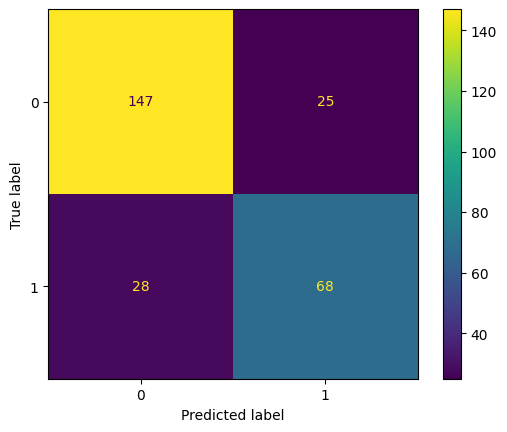

In [6]:
# plot the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

### 4.3. Accuracy

This metric compares the total number of correct predictions against the total. This is the most common metric, however it is not the best performance evaluator, especially in imbalanced datasets.

$$Accuracy = {TP + TN \over TP + TN + FP + FN}$$

In [7]:
from sklearn.metrics import accuracy_score

# get the accuracy based on the true labels (y_test) and the models prediciton (y_test_pred)
acc = accuracy_score(y_test, y_test_pred)

print('Accuracy:', acc)

Accuracy: 0.8022388059701493


### 4.4. Precision or Positive Predictive Value (PPV)

Precision denotes the percentage of predicted positive samples out of the total predicted positive samples. With this metric we can answer the question _How much the model is right when it says it is right?_.

$$Precision = {TP\over TP + FP}$$

In [8]:
from sklearn.metrics import precision_score

# get the precision based on the true labels (y_test) and the models prediciton (y_test_pred)
prec = precision_score(y_test, y_test_pred)

print('Precision:', prec)

Precision: 0.7311827956989247


### 4.5. Recall, Sensitivity or True Positive Rate (TPR)

This metric denotes the percentage of correctly positive predicted samples against the total positive samples. It allows to answer _How much the model is able to predict the positive cases?_.

$$Recall = {TP\over TP + FN}$$

In [9]:
from sklearn.metrics import recall_score

# get the recall based on the true labels (y_test) and the models prediciton (y_test_pred)
recall = recall_score(y_test, y_test_pred)

print('Recall:', recall)

Recall: 0.7083333333333334


### 4.6. Specificity or True Negative Rate (TNR)

On the contrary, this metric details the percentage of correctly predicted negative examples among the total number of negative cases. We can then answer the question _How much the model is able to predict the negative cases?_.

$$Specificity = {TN\over TN + FP}$$

In [10]:
# calculate the specificity using the true negatives and false positives obtained from the confusion matrix
spec = tn / (tn + fp)

print('Specificity:', spec)

Specificity: 0.8546511627906976


In [11]:
# alternative: get specificity through recall_score function by defining pos_label=0
spec = recall_score(y_test, y_test_pred, pos_label=0)

print('Specificity:', spec)

Specificity: 0.8546511627906976


### 4.7. F1 Score

The F1 score is computed by the harmonic mean of precision and recall. This takes the contribution of both, so higher the F1 score, the better. 

Whereas the regular mean treats all values equally, the harmonic mean gives much more weight to low values. As a result, the model will only get a high F1 score only if both recall and precision are
high.

$$\text{F1 Score} = {2\over {1 \over Precision} + {1 \over Recall}} = {2 * Precision * Recall\over Precision + Pecall}$$

In [12]:
from sklearn.metrics import f1_score

# get the f1 score based on the true labels (y_test) and the models prediciton (y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print('F1 Score:', f1)

F1 Score: 0.7195767195767196


### 4.8. Precision-Recall Curve

This curve evaluates the model by scoring based on different decision functions, or threshold values, when the predictions can be evaluated as probabilities.The PR curve than plots the balance between Precision and Recall values.

This type of curve is more suited to compare between different models.

In [13]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

# get the predicition probability of the positive class
y_scores = y_test_pred_proba[:, 1]

# get the precision recall curve using the true labels (y_test) and the prediction probabilty of the positive class (y_scores)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

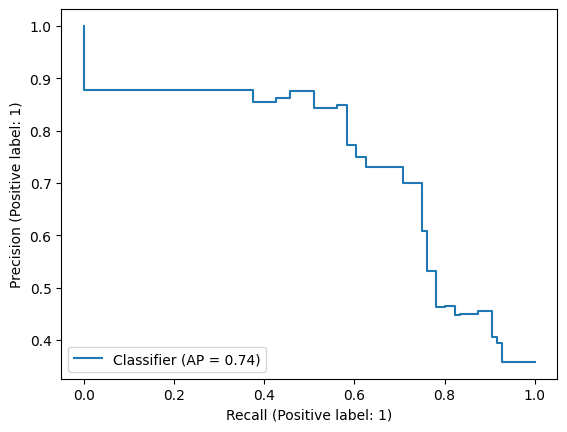

In [14]:
# plot the precision recall curve
PrecisionRecallDisplay.from_predictions(y_test, y_scores)

### 4.9. Receiver Operating Characteristic (ROC) Curve

The ROC curve also compares, for different threshold values, the True Positive Rate (TPR) against the False Positive Rate (FPR). This curve allows to evaluate the quality of the model in terms of its capacity to detect both real positive and negative cases.

In these curves, the top left corner is the usually where the best threshold sits, if we give equal importance to Recall and Specificity.

$$\text{True Positive Rate  (TPR)} = Recall = {TP\over TP + FN}$$

$$\text{False Positive Rate  (FPR)} = 1 - Specificity = {FP\over TN + FP}$$

In [15]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# get the ROC curve using the true labels (y_test) and the prediction probabilty of the positive class (y_scores)
fprs, tprs, thresholds = roc_curve(y_test, y_scores)

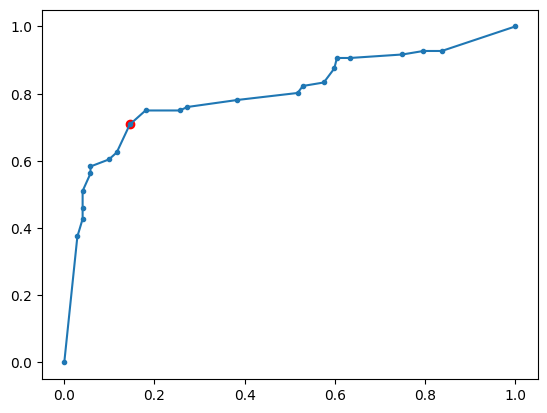

In [16]:
import matplotlib.pyplot as plt

# plot the ROC curve
plt.plot(fprs,tprs, '.-')

# get the last point where the thresholds is greater than 0.5
idx = np.where(thresholds > 0.5)[0][-1]

# mark this point in red
plt.scatter(fprs[idx], tprs[idx], color='red')

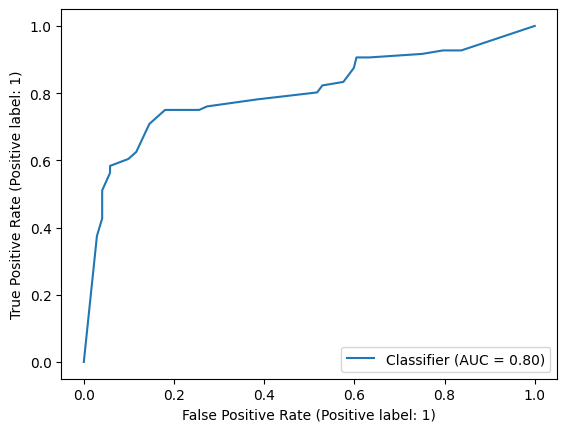

In [19]:
# alternative: plot ROC curve using sklearn in-built function
RocCurveDisplay.from_predictions(y_test, y_scores)

### 4.10. Area Under the ROC Curve (AUROC / ROC AUC)

This metric translates the ROC curve of a model to a single numerical value, which allows for a more easy comparison between models.

In [ ]:
from sklearn.metrics import roc_auc_score

# get the area under the ROC curve using he true labels (y_test) and the prediction probabilty of the positive class (y_scores)
auroc = roc_auc_score(y_test, y_scores)

print('ROC AUC:', auroc)

### 4.11. Exercises

__Exercise 3__: For the Breast Cancer dataset and trained classifier, present the relevant performance metrics.

__Exercise 4__: Compare the Accuracy of Train and Test sets. What do you conclude?

__Exercise 5__: Considering the use case and objective, which metric(s) become(s) more relevant? Why?

__Exercise 6__: Obtain the ROC curve values and plot. What do you conclude from the graph?

__Exercise 7__: Which decisioning threshold is the most appropriate, considering equal relevance for TPR and FPR?